# Video: Implementing Iterative Policy Evaluation

Iterative policy evaluation is an algorithm for computing state values while following a given policy.
This video will show you how to implement iterative policy evaluation while making connections to the value iteration method.

Script: (faculty on screen)
* Iterative policy evaluation is an algorithm for computing state values while following a given policy.
* It has some similarities to value iteration, but instead of computing optimal values under any policy, it computes the values of a specified policy.
* The resulting computation is similar to value iteration, but can be much faster if there are many actions.

## Problem Setup

Problem size:
* $k$ actions
* $n$ states

Problem dynamics:
* $R: k \times n$ array of expected rewards for each action+state
* $P: k \times n \times n$ array of transition probabilities for each action/current state/next state.
* $\gamma$ discount factor for future rewards

New:
* $\pi: n$ array of state actions (a deterministic policy)

Script:
* The problem setup for iterative policy evaluation is similar to optimal value problems.
* We are given an array of expected rewards for each action and state, and an array of transition probabilities for each action.
* We are also given a discount factor gamma.
* The change from optimal value problems is that we are also given a policy, and we will be computing the value subject to following that policy.

## Factoring out Action Choices using Policy

\begin{array}{rcl}
\mathcal{R}^\pi_i & = & \sum_a \pi(i, a) \mathcal{R}^a_i \\
\mathcal{P}^\pi_{i,j} & = & \sum_a \pi(i,a) \mathcal{P}^a_{i, j}
\end{array}


Script:
* The first thing that we do with value iteration is compute the expected rewards and transition probabilities conditioned on following the given policy.
* This reduces our Markov decision process to a Markov reward policy or a Markov decision process with just one action.
* We will use the latter structure and reuse some of our value iteration code.


## Iterative Policy Evaluation Algorithm

1. Factor out the policy action choices.
\begin{array}{rcl}
\mathcal{R}^\pi_i & = & \sum_a \pi(i, a) \mathcal{R}^a_i \\
\mathcal{P}^\pi_{i,j} & = & \sum_a \pi(i,a) \mathcal{P}^a_{i, j}
\end{array}
2. Initialize $v_0 = [0,\ldots, 0]$.
3. Repeat until values stop changing:
\begin{array}{rcl}
v_{i+1}&=& \mathcal{R}^\pi + \gamma \mathcal{P}^\pi v_i
\end{array}

Script:
* Here is the whole iterative policy evaluation algorithm.
* The first step computes the rewards and transition probabilities with the previous formulas.
* The second step initializes the values.
* The third step repeatedly updates the values based on the policy rewards and transitions.
* These last two steps are similar to the value iteration algorithm, but there is no max to pick the optimal action since there is only one action.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# copied from Implementing Value Iteration video
def compute_qT_once(R, P, gamma, v):
    return R + gamma * P @ v

In [ ]:
# copied from Implementing Value Iteration video
def iterate_values_once(R, P, gamma, v):
    return np.max(compute_qT_once(R, P, gamma, v), axis=0)

In [ ]:
# copied from Implementing Value Iteration video
def value_iteration(R, P, gamma, max_iterations=100, tolerance=0.001):
    # initial approximation v_0
    v_old = np.zeros(R.shape[-1])

    for i in range(max_iterations):
        # compute v_{i+1}
        v_new = iterate_values_once(R, P, gamma, v_old)

        # check if values did not change much
        if np.max(np.abs(v_new - v_old)) < tolerance:
            return v_new

        v_old = v_new

    # return v_{max_iterations}
    return v_old

Script:
* Here I have a copy of my code for value iteration.
* I'm going to copy it now and modify it for iterative policy evaluation.

In [ ]:
def iterative_policy_evaluation(R, P, gamma, pi, max_iterations=100, tolerance=0.001):
    # factor out action choices using policy.

    # probabilistic version for probabilistic policies.
    # using einsum to make fancy summations concise.
    # R_pi = np.einsum("ij,ji->i", pi, R)
    # P_pi = np.einsum("ik,kij->ij", pi, P)

    # deterministic version
    n = R.shape[-1]
    R_pi = R[pi, np.arange(n)]
    P_pi = P[pi, np.arange(n),:]

    # reshape to one dummy action to reuse previous example code
    R_pi = R_pi.reshape(1, *R_pi.shape)
    P_pi = P_pi.reshape(1, *P_pi.shape)

    # initial approximation v_0
    v_old = np.zeros(R.shape[-1])

    for i in range(max_iterations):
        # compute v_{i+1}
        v_new = iterate_values_once(R_pi, P_pi, gamma, v_old)

        # check if values did not change much
        if np.max(np.abs(v_new - v_old)) < tolerance:
            return v_new

        v_old = v_new

    # return v_{max_iterations}
    return v_old

Script:
* The most complicated part of iterative policy evaluation is applying the policy $\pi$ to the rewards and transition probabilities.
* I used NumPy's `einsum` function to describe the for loops and summations more concisely, but they are pretty dense.
* Loosely speaking, the first string parameter labels both input arrays' dimensions and says which of them should be used as output dimensions.
* Any other dimensions that are not output dimensions will be summed up.
* After that, a dummy dimension of one is added to the beginning of each shape as if there was exactly one action.
* This is not really choice to make, but let's me reuse the previous functions for value iteration.
* The rest of the changes are essentially running value iteration on the new rewards and transition probabilities.

## Example Environment

<table>
<tr><td align="right">0🧊</td><td align="right">1🧊</td><td align="right">2🧊</td><td align="right">3🧊</td><td align="right">4🧊</td><td align="right">5🧊</td><td align="right">6🧊</td></tr>
<tr><td align="right">7🧊</td><td align="right">8🧊</td><td align="right">9🧊</td><td align="right">10🧊</td><td align="right">11🧊</td><td align="right">12🧊</td><td align="right">13🧊</td></tr>
<tr><td align="right">14🧊</td><td align="right">15🧊</td><td align="right">16🧊</td><td align="right">17🧊</td><td align="right">18🧊</td><td align="right">19🧊</td><td align="right">20🧊</td></tr>
<tr><td align="right">21🧊</td><td align="right">22🧊</td><td align="right">23🧊</td><td align="right">24🧊</td><td align="right">25🧊</td><td align="right">26🧊</td><td align="right">27🧊</td></tr>
<tr><td align="right">28🧊</td><td align="right">29🧊</td><td align="right">30🧊</td><td align="right">31🧊</td><td align="right">32🧊</td><td align="right">33🧊</td><td align="right">34🧊</td></tr>
<tr><td align="right">35🧊</td><td align="right">36🧊</td><td align="right">37🧊</td><td align="right">38🧊</td><td align="right">39🧊</td><td align="right">40🧊</td><td align="right">41🧊</td></tr>
<tr><td align="right">42🧊</td><td align="right">43🧊</td><td align="right">44🧊</td><td>45🧊</td><td align="right">46🧊</td><td align="right">47🧊</td><td align="right">48🐟</td></tr>
<tr><td></td></tr>
<tr><td align="right">49☑️</td></tr>
</table>

Script:
* I will reuse the same penguin seeking fish environment as in the value iteration video.

In [ ]:
actions = ["⬆️", "⬇️", "⬅️", "➡️"]

In [ ]:
P = np.zeros(shape=(len(actions), 50, 50))
for s in range(48):
    # row major order with (0,0) as top left
    x = s % 7
    y = s // 7

    # up action
    if y > 0:
        P[0, s, s-7] = 1
    else:
        P[0, s, s] = 1

    # down action
    if y < 6:
        P[1, s, s+7] = 1
    else:
        P[1, s, s] = 1

    # left action
    if x > 0:
        P[2, s, s-1] = 1
    else:
        P[2, s, s] = 1

    # right action
    if x < 6:
        P[3, s, s+1] = 1
    else:
        P[3, s, s] = 1

# fish state goes to terminal state
P[:,48,49] = 1

# stay in terminal state
P[:,49,49] = 1

In [ ]:
R = np.zeros(shape=(4,50))
R[:,48] = 1

In [ ]:
gamma = 0.9

## Example Policy

<table>
<tr><td>➡️</td><td>➡️</td><td>➡️</td><td>➡️</td><td>➡️</td><td>➡️</td><td>⬇️</td></tr>
<tr><td>➡️</td><td>➡️</td><td>➡️</td><td>➡️</td><td>➡️</td><td>➡️</td><td>⬇️</td></tr>
<tr><td>➡️</td><td>➡️</td><td>➡️</td><td>➡️</td><td>➡️</td><td>➡️</td><td>⬇️</td></tr>
<tr><td>➡️</td><td>➡️</td><td>➡️</td><td>➡️</td><td>➡️</td><td>➡️</td><td>⬇️</td></tr>
<tr><td>➡️</td><td>➡️</td><td>➡️</td><td>➡️</td><td>➡️</td><td>➡️</td><td>⬇️</td></tr>
<tr><td>➡️</td><td>➡️</td><td>➡️</td><td>➡️</td><td>➡️</td><td>➡️</td><td>⬇️</td></tr>
<tr><td>➡️</td><td>➡️</td><td>➡️</td><td>➡️</td><td>➡️</td><td>➡️</td><td>⬇️</td></tr>
<tr><td></td></tr>
<tr><td>➡️</td></tr>
</table>


Script:
* To demonstrate iterative policy evaluation, I will use this policy.
* Go right unless the penguin is on the right edge of the grid.
* And go down if on the right edge of the grid.
* This is one of many optimal policies for this environment.

In [ ]:
pi = np.zeros(50, dtype="int64")
# all states pick action 3 (right)
pi[:] = 3
# change right edge states to pick action 1 (down)
pi[6:49:7] = 1
pi

array([3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 1, 3])

Script:
* This is a deterministic policy, so it just has one entry specifying the action for each state.
* We can visualize quickly to double check.

In [ ]:
np.asarray([actions[a] for a in pi[:49]]).reshape(7, 7)

array([['➡️', '➡️', '➡️', '➡️', '➡️', '➡️', '⬇️'],
       ['➡️', '➡️', '➡️', '➡️', '➡️', '➡️', '⬇️'],
       ['➡️', '➡️', '➡️', '➡️', '➡️', '➡️', '⬇️'],
       ['➡️', '➡️', '➡️', '➡️', '➡️', '➡️', '⬇️'],
       ['➡️', '➡️', '➡️', '➡️', '➡️', '➡️', '⬇️'],
       ['➡️', '➡️', '➡️', '➡️', '➡️', '➡️', '⬇️'],
       ['➡️', '➡️', '➡️', '➡️', '➡️', '➡️', '⬇️']], dtype='<U2')

Script:
* Now let's run our iterative policy evaluation code.

In [ ]:
v_pi = iterative_policy_evaluation(R, P, gamma, pi)
v_pi

array([0.28242954, 0.3138106 , 0.34867844, 0.38742049, 0.43046721,
       0.4782969 , 0.531441  , 0.3138106 , 0.34867844, 0.38742049,
       0.43046721, 0.4782969 , 0.531441  , 0.59049   , 0.34867844,
       0.38742049, 0.43046721, 0.4782969 , 0.531441  , 0.59049   ,
       0.6561    , 0.38742049, 0.43046721, 0.4782969 , 0.531441  ,
       0.59049   , 0.6561    , 0.729     , 0.43046721, 0.4782969 ,
       0.531441  , 0.59049   , 0.6561    , 0.729     , 0.81      ,
       0.4782969 , 0.531441  , 0.59049   , 0.6561    , 0.729     ,
       0.81      , 0.9       , 0.531441  , 0.59049   , 0.6561    ,
       0.729     , 0.81      , 0.9       , 1.        , 0.        ])

Script:
* This looks similar to the optimal values that we saw in the value iteration video.
* Let's plot the values to spot check.

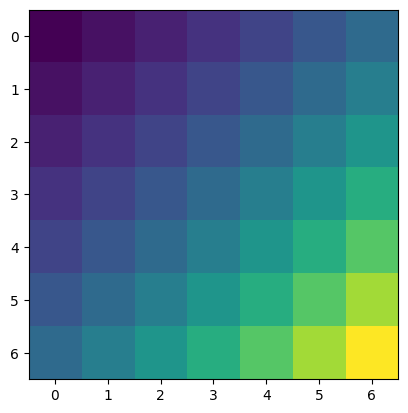

In [ ]:
plt.imshow(v_pi[:49].reshape(7, 7));

Script:
* As we saw before with value iteration, the state values are determined by the number of steps for the penguin to get to the fish.

Script: (faculty on screen)
* If you have a policy in hand, iterative policy evaluation can compute its values easily.
* Compared to value iteration, it will typically be faster since the first thing it does is factor out the actions.
* So the iteration part of the algorithm is essentially running with just one action where there were previously $k$.
* The catch for this speedup is that iterative policy evaluation needs a policy as input, and only evaluates the given policy.
* It does not optimize the policy.
* We will cover explicit policy construction in a follow up video.